In [31]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Trainability

## 1D, Constant Function

In [32]:
qnn_list = loader(data_path("trainability_qnn_1D_reps_1_constant"))
dnn_list = loader(data_path("trainability_dnn_1D_constant"))

In [33]:
loss1 = np.array([model.loss for model in qnn_list])
std1 = np.std(loss1, axis=0)
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([model.loss for model in dnn_list])
std2 = np.std(loss2, axis=0)
avg2 = np.mean(loss2, axis=0)

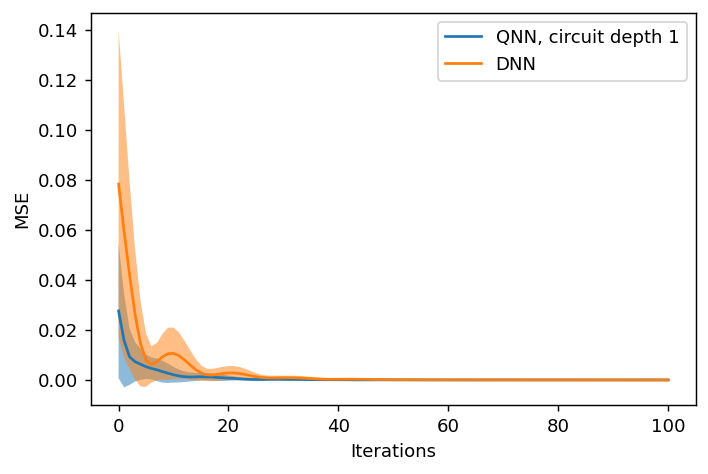

In [34]:
start = 0
stop = 101
alpha = 0.5
spacing1 = list(range(101))
spacing2 = list(range(stop))

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')

plt.fill_between(spacing1, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(spacing2, (avg2 - std2)[:stop], (avg2 + std2)[:stop], alpha=alpha)
plt.plot(spacing1, avg1)
plt.plot(spacing2, avg2[:stop])

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["QNN, circuit depth 1", "DNN"])
plt.show()

## 1D, Gaussian Function

In [35]:
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.3, 0.02) - gaussian(x, 0.7, 0.02) 

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)

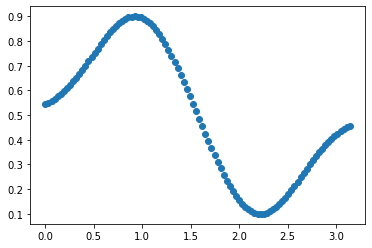

In [36]:
plt.plot(x, y, 'o')
plt.show()

In [37]:
qnn_list1 = loader(data_path("trainability_qnn_1D_reps_1"))
qnn_list2 = loader(data_path("trainability_qnn_1D_reps_2"))
dnn_list = loader(data_path("trainability_dnn_1D"))

In [38]:
loss1 = np.array([qnn.loss for qnn in qnn_list1])
std1 = np.std(loss1, axis=0)
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([qnn.loss for qnn in qnn_list2])
std2 = np.std(loss2, axis=0)
avg2 = np.mean(loss2, axis=0)

loss3 = np.array([dnn.loss for dnn in dnn_list])
std3 = np.std(loss3, axis=0)
avg3 = np.mean(loss3, axis=0)

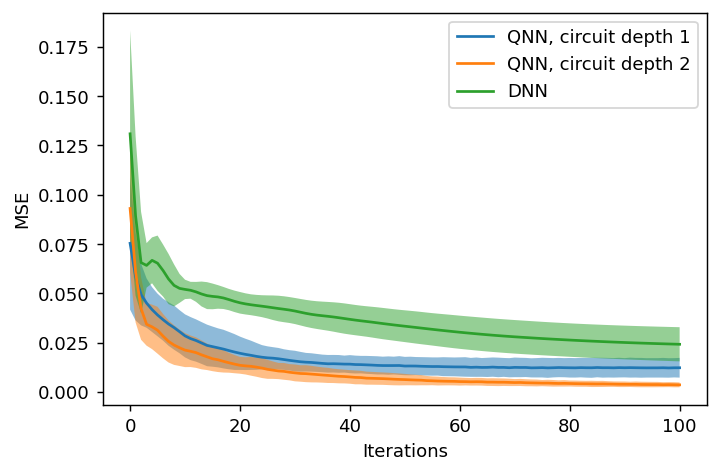

In [57]:
start = 0
stop = 101
alpha = 0.5
spacing1 = list(range(101))
spacing2 = list(range(stop))

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')

plt.fill_between(spacing1, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(spacing1, avg2 - std2, avg2 + std2, alpha=alpha)
plt.fill_between(spacing2, (avg3 - std3)[:stop], (avg3 + std3)[:stop], alpha=alpha)
plt.plot(spacing1, avg1)
plt.plot(spacing1, avg2)
plt.plot(spacing2, avg3[:stop])

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["QNN, circuit depth 1", "QNN, circuit depth 2", "DNN"])
plt.show()

In [40]:
print(avg1[-1], avg2[-1], avg3[-1])

0.0028353613624610375 0.0003787888431359319 9.623766881427529e-05


In [41]:
y_pred1 = np.mean(np.array([model.predict(x) for model in qnn_list1]), axis=0)
y_pred2 = np.mean(np.array([model.predict(x) for model in qnn_list2]), axis=0)
y_pred3 = np.mean(np.array([model.predict(x) for model in dnn_list]), axis=0)

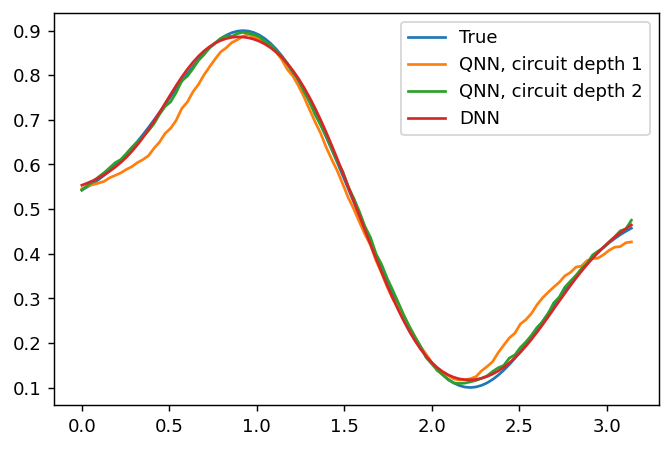

In [42]:
fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')

plt.plot(x, y)
plt.plot(x, y_pred1)
plt.plot(x, y_pred2)
plt.plot(x, y_pred3)
plt.legend(["True", "QNN, circuit depth 1", "QNN, circuit depth 2", "DNN"])

plt.show()

## 2D

In [43]:
np.random.seed(42)

n = 10
x = np.linspace(0, 1, n)
x = generate_meshgrid([x,x])

mean1 = np.array([[0.25, 0.75]])
var1 = np.array([[0.02, 0], [0, 0.02]])

mean2 = np.array([[0.75, 0.25]])
var2 = np.array([[0.02, 0], [0, 0.02]])

mean3 = np.array([[0.25, 0.25]])
var3 = np.array([[0.02, 0], [0, 0.02]])

mean4 = np.array([[0.75, 0.75]])
var4 = np.array([[0.02, 0], [0, 0.02]])

y = gaussian(x, mean1, var1) + gaussian(x, mean2, var2) - gaussian(x, mean3, var3) - gaussian(x, mean4, var4)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)

In [44]:
qnn_list1 = loader(data_path("trainability_qnn_2D_reps_1"))
qnn_list2 = loader(data_path("trainability_qnn_2D_reps_2"))
dnn_list = loader(data_path("trainability_dnn_2D"))

In [45]:
loss1 = np.array([qnn.loss for qnn in qnn_list1])
std1 = np.std(loss1, axis=0)
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([qnn.loss for qnn in qnn_list2])
std2 = np.std(loss2, axis=0)
avg2 = np.mean(loss2, axis=0)

loss3 = np.array([dnn.loss for dnn in dnn_list])
std3 = np.std(loss3, axis=0)
avg3 = np.mean(loss3, axis=0)

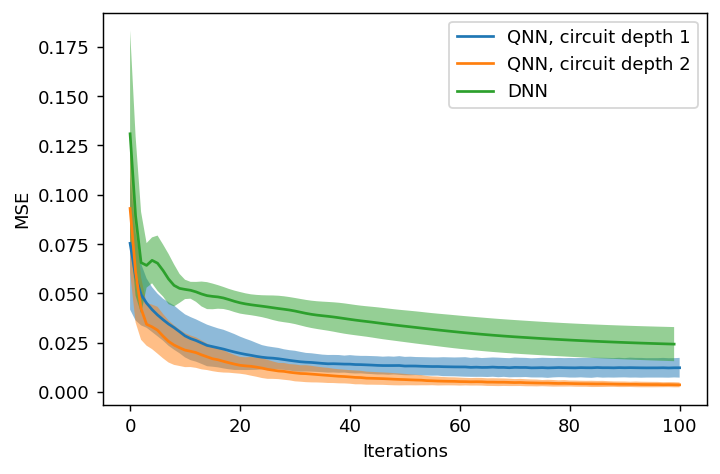

In [46]:
start = 0
stop = 100
alpha = 0.5
spacing1 = list(range(101))
spacing2 = list(range(stop))

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')

plt.fill_between(spacing1, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(spacing1, avg2 - std2, avg2 + std2, alpha=alpha)
plt.fill_between(spacing2, (avg3 - std3)[:stop], (avg3 + std3)[:stop], alpha=alpha)
plt.plot(spacing1, avg1)
plt.plot(spacing1, avg2)
plt.plot(spacing2, avg3[:stop])

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["QNN, circuit depth 1", "QNN, circuit depth 2", "DNN"])
plt.show()

0.9026982893727232


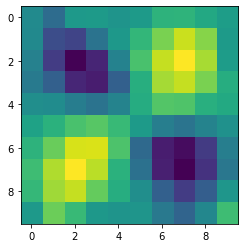

In [47]:
y_pred = qnn_list2[0].predict(x)
print(r2(y_pred, y))
plt.imshow(y_pred.reshape(n,n))
plt.show()

## 3D

In [2]:
np.random.seed(42)

n = 5
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)

In [6]:
qnn_list1 = loader(data_path("trainability_qnn_3D_reps_1"))
qnn_list2 = loader(data_path("trainability_qnn_3D_reps_2"))
dnn_list = loader(data_path("trainability_dnn_2D"))

In [7]:
loss1 = np.array([qnn.loss for qnn in qnn_list1])
std1 = np.std(loss1, axis=0)
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([qnn.loss for qnn in qnn_list2])
std2 = np.std(loss2, axis=0)
avg2 = np.mean(loss2, axis=0)

loss3 = np.array([dnn.loss for dnn in dnn_list])
std3 = np.std(loss3, axis=0)
avg3 = np.mean(loss3, axis=0)

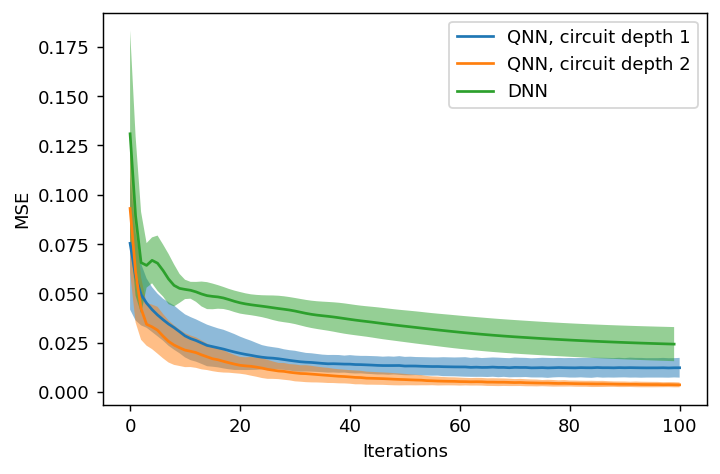

In [53]:
start = 0
stop = 100
alpha = 0.5
spacing1 = list(range(101))
spacing2 = list(range(stop))

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')

plt.fill_between(spacing1, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(spacing1, avg2 - std2, avg2 + std2, alpha=alpha)
plt.fill_between(spacing2, (avg3 - std3)[:stop], (avg3 + std3)[:stop], alpha=alpha)
plt.plot(spacing1, avg1)
plt.plot(spacing1, avg2)
plt.plot(spacing2, avg3[:stop])

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["QNN, circuit depth 1", "QNN, circuit depth 2", "DNN"])
plt.show()

In [ ]:
y_pred = qnn_list3[0].predict(x)
print(r2(y_pred, y))
print(qnn_list1[0].loss[-1])

In [ ]:
y_pred = qnn_list3[0].predict(x)
plt.imshow(y_pred.reshape(n,n,n)[1])
plt.show()
plt.imshow(y.reshape(n,n,n)[1])
plt.show()